In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 


c:\Users\Mouadh Fraj\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS=50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size =(IMAGE_SIZE,IMAGE_SIZE),
    batch_size =BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names =dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset
    )

68

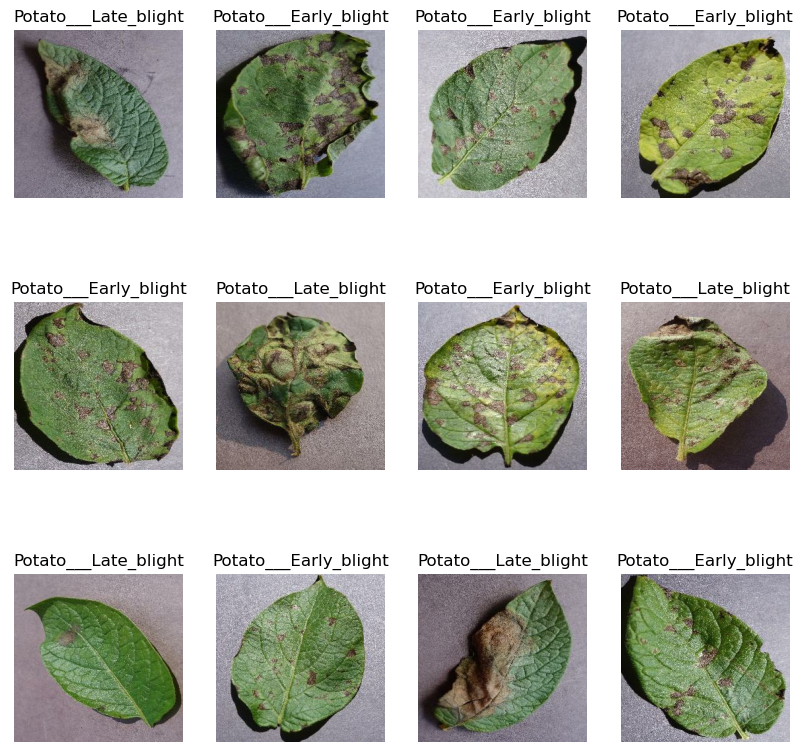

In [6]:
plt.figure(figsize=(10,10))
for image_batch , label_batch in dataset.take(1):
    for i in range (12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype(int))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [8]:
train_ds= dataset.take(54)
len(train_ds)

54

In [9]:
test_ds= dataset.skip(54)
len(test_ds)

14

In [10]:
val_ds= test_ds.take(6)
len(val_ds)

6

In [11]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [14]:

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:

len(train_ds)

54

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [29]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [31]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [33]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_1 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (32, 60, 60, 64)        

In [35]:
model.compile(
    optimizer ='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits =False),
    metrics=['accuracy']
)

In [36]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50


54/54 [==============================] - 47s 669ms/step - loss: 0.9146 - accuracy: 0.4549 - val_loss: 0.7923 - val_accuracy: 0.5104
Epoch 2/50
54/54 [==============================] - 29s 532ms/step - loss: 0.6594 - accuracy: 0.6730 - val_loss: 0.5044 - val_accuracy: 0.7240
Epoch 3/50
54/54 [==============================] - 25s 467ms/step - loss: 0.4505 - accuracy: 0.7980 - val_loss: 0.2929 - val_accuracy: 0.9167
Epoch 4/50
54/54 [==============================] - 25s 461ms/step - loss: 0.3044 - accuracy: 0.8808 - val_loss: 0.3698 - val_accuracy: 0.8594
Epoch 5/50
54/54 [==============================] - 25s 463ms/step - loss: 0.2815 - accuracy: 0.8872 - val_loss: 0.1558 - val_accuracy: 0.9271
Epoch 6/50
54/54 [==============================] - 26s 473ms/step - loss: 0.2071 - accuracy: 0.9196 - val_loss: 0.1635 - val_accuracy: 0.9375
Epoch 7/50
54/54 [==============================] - 25s 459ms/step - loss: 0.1707 - accuracy: 0.9334 - val_loss: 0.0910 - val_accuracy: 0.96

In [37]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 5s 204ms/step - loss: 0.0356 - accuracy: 0.9883


In [38]:
scores

[0.035571563988924026, 0.98828125]

In [39]:
history

In [40]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
history.history['accuracy']

[0.4548611044883728,
 0.6730324029922485,
 0.7980324029922485,
 0.8807870149612427,
 0.8871527910232544,
 0.9195601940155029,
 0.9334490895271301,
 0.9363425970077515,
 0.9461805820465088,
 0.9577546119689941,
 0.9785879850387573,
 0.9924768805503845,
 0.9785879850387573,
 0.9884259104728699,
 0.9913194179534912,
 0.9907407164573669,
 0.9733796119689941,
 0.9872685074806213,
 0.9959490895271301,
 0.9913194179534912,
 0.9965277910232544,
 0.9976851940155029,
 0.9890046119689941,
 0.9976851940155029,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [49]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

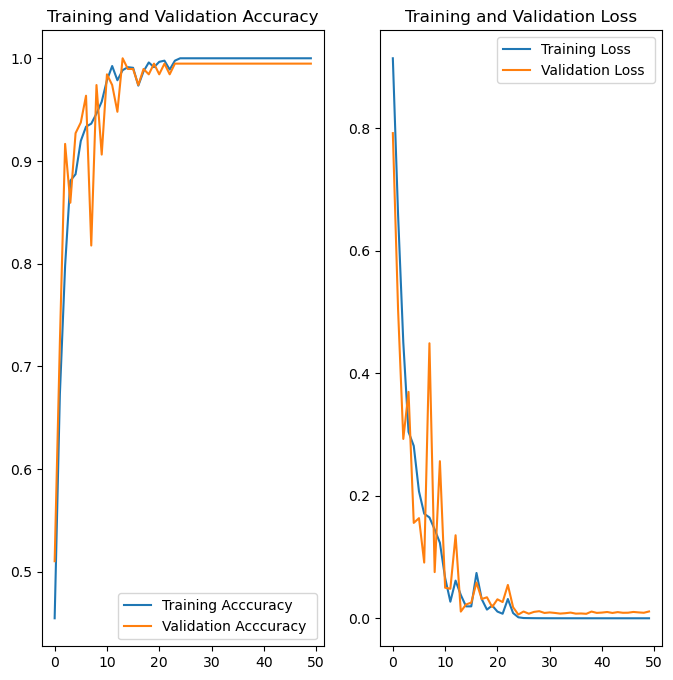

In [65]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label='Training Acccuracy ')
plt.plot(range(EPOCHS), val_acc, label='Validation Acccuracy ')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label='Training Loss ')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss ')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
first image's actual label: Potato___Early_blight
1/1 [==============================] - 0s 203ms/step
predicted label: Potato___Early_blight


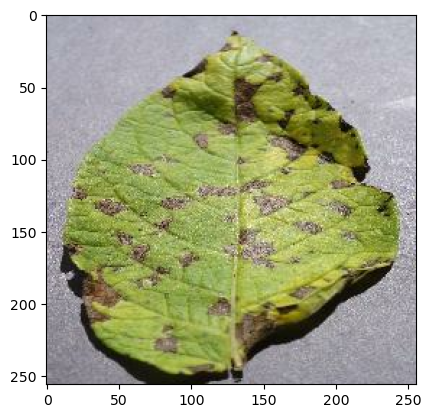

In [94]:
import numpy as np 
for images_batch, labels_batch in test_ds.take(1):
   first_image=images_batch[0].numpy().astype('uint8')
   first_label=labels_batch[0].numpy()
   print("first image to predict")
   plt.imshow(first_image)
   print("first image's actual label:", class_names[first_label])
   batch_prediction = model.predict(images_batch)
   print ("predicted label:",class_names[np.argmax(batch_prediction[0])])
   
   

In [95]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 31ms/step


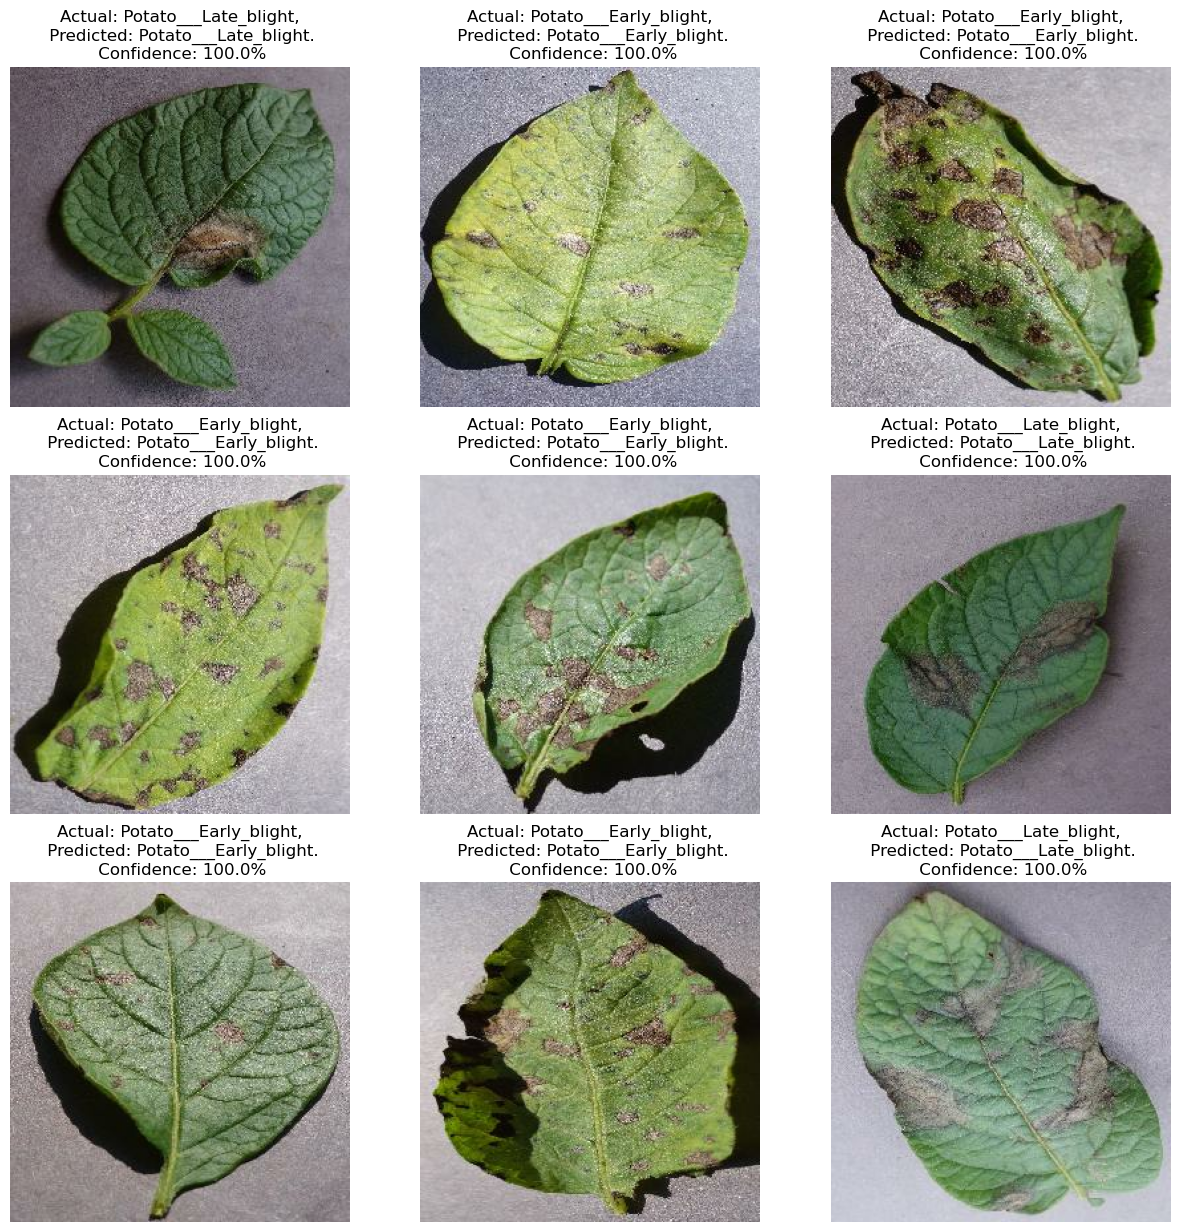

In [96]:

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [97]:
model_version=1
model.save(f"/models/{model_version}")

INFO:tensorflow:Assets written to: /models/1\assets


INFO:tensorflow:Assets written to: /models/1\assets
